# Import - Standard Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import - Dataset

In [387]:
# Import the Red Wine Quality dataset
# https://archive.ics.uci.edu/ml/datasets/wine+quality

dataset = pd.read_csv('winequality-red.csv', sep=';')

# Print the first 5 rows of the dataframe.
print(dataset.head())

# Print the shape of the dataframe
print(dataset.shape)

print(dataset['quality'].describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Data Analysis

The first steps performed by the paper was to do:
1. Pearson Correlation Analysis
2. Principal Component Analysis (PCA)
2. Shapiro-Wilk Normality Test

## Pearson Correlation Analysis

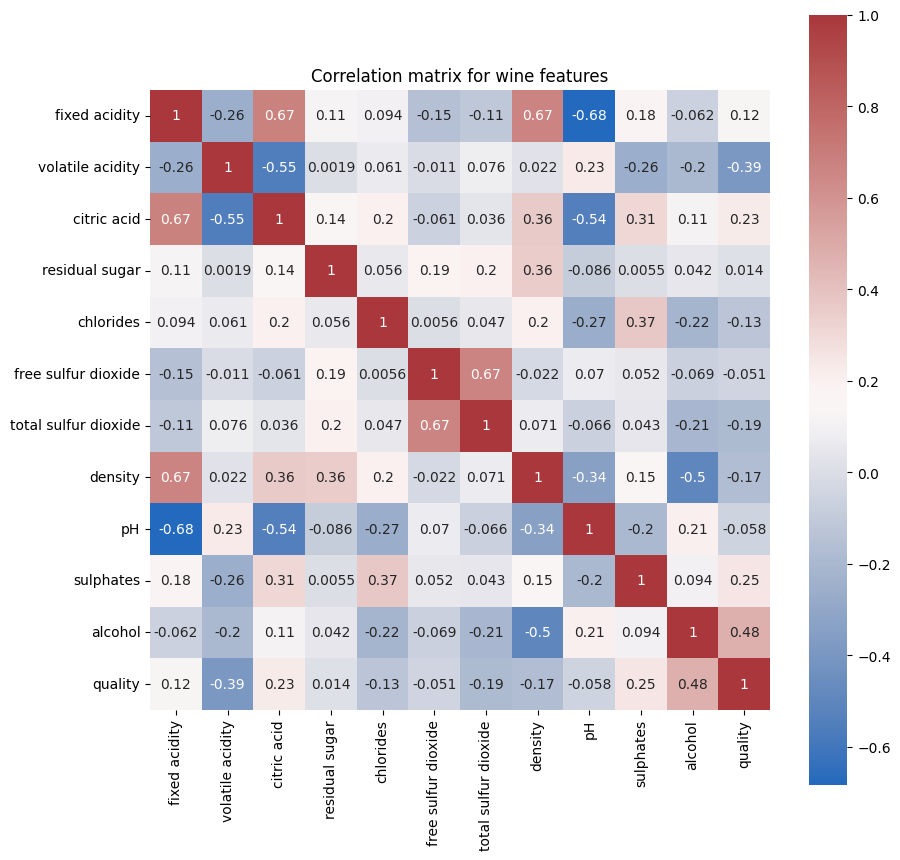

In [5]:
# Creat a correlation matrix for the wine dataset using the Pearson method
mat = dataset.corr(method='pearson', min_periods=1)

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(mat, vmax=1, square=True, annot=True, cmap='vlag')
plt.title('Correlation matrix for wine features')
plt.show()



## Principal Component Analysis (PCA)

In [6]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.iloc[:,:-1])



## Shapiro-Wiuilk Test

In [357]:
from scipy.stats import shapiro
# Conduct a Shapiro-Wilk test for normality
# Null Hypothesis: The data is normally distributed
# Alternative Hypothesis: The data is not normally distributed
# Set alpha to 0.05
alpha = 0.05
for column in dataset.columns:
    stat, p = shapiro(dataset[column])
    print(column, ': Statistics=%.3f, p=%.3f' % (stat, p))
    # if p > alpha:
    #     print('The data is normally distributed (fail to reject H0)')
    # else:
    #     print('The data is not normally distributed (reject H0)')
    #print('\n')

fixed acidity : Statistics=0.942, p=0.000
volatile acidity : Statistics=0.974, p=0.000
citric acid : Statistics=0.955, p=0.000
residual sugar : Statistics=0.566, p=0.000
chlorides : Statistics=0.484, p=0.000
free sulfur dioxide : Statistics=0.902, p=0.000
total sulfur dioxide : Statistics=0.873, p=0.000
density : Statistics=0.991, p=0.000
pH : Statistics=0.993, p=0.000
sulphates : Statistics=0.833, p=0.000
alcohol : Statistics=0.929, p=0.000
quality : Statistics=0.858, p=0.000


# Implement the Neural Network

## Mess around with ordering

(12, 12)


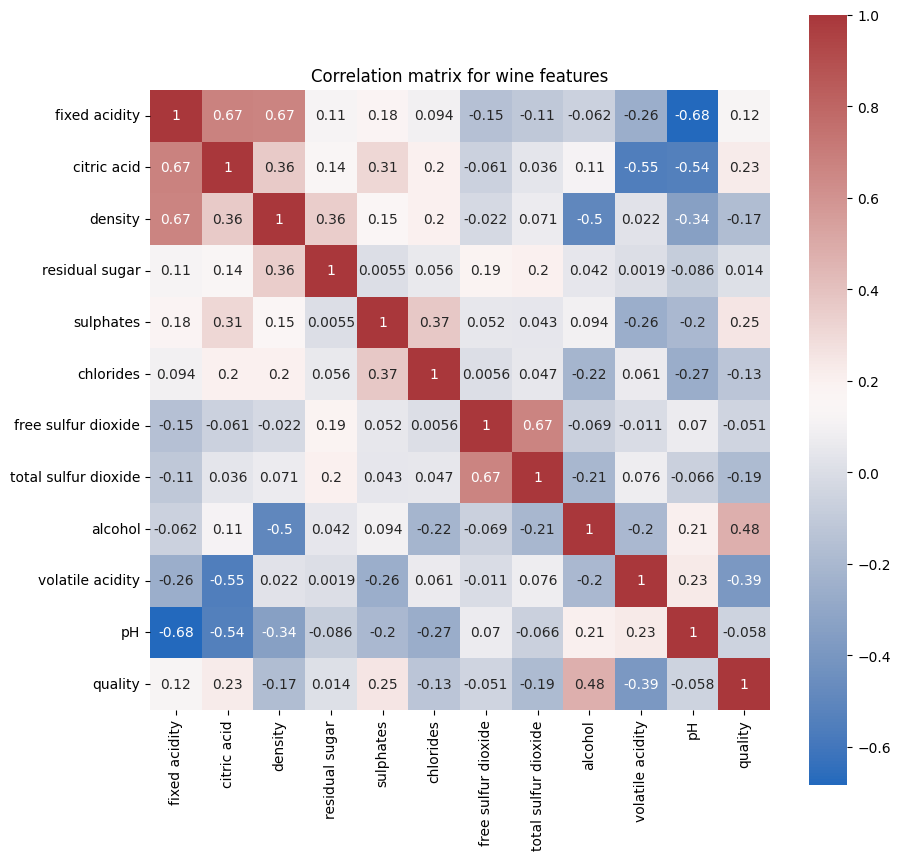

In [388]:

sort_df = dataset.loc[:, ['fixed acidity', 'citric acid', 'density', 'residual sugar', 'sulphates', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'volatile acidity', 'pH', 'quality']]
#print(sort_df)

# Creat a correlation matrix for the wine dataset using the Pearson method
mat = sort_df.corr(method='pearson', min_periods=1)

print(mat.shape)
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(mat, vmax=1, square=True, annot=True, cmap='vlag')
plt.title('Correlation matrix for wine features')
plt.show()

In [389]:
# Create the test and train data from the sorted data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Create the features (X) and target (y) data
X = sort_df.drop('quality', axis=1)
y = sort_df['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(y), random_state=24)

# Scale the X_train and X_test data
scaler = MinMaxScaler()

# Fit the scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# # Create the SMOTE oversampling object
# smote = SMOTE(random_state=78)

# # Fit the SMOTE model to the data
# X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# # Combine the X_train smote and X_train scaled data
# X_train = np.concatenate((X_train_scaled, X_train_smote))
# y_train = np.concatenate((y_train, y_train_smote))



X_train_d = tf.expand_dims(X_train_scaled, axis=-1)
X_test_d = tf.expand_dims(X_test_scaled, axis=-1)
print(X_train_d.shape)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = tf.keras.utils.to_categorical(y_train, 10)
y_test_binary = tf.keras.utils.to_categorical(y_test, 10)

print(y_train_binary.shape)
print(y_test_binary)


(1199, 11, 1)
(1199, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Create the Neural Network

## With Convolution

### 1DCNN

In [426]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=X_train_d.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'), # First Dense layer
    tf.keras.layers.Dropout(0.4), # First Dropout layer
    tf.keras.layers.BatchNormalization(), # First Batch normalization layer
    tf.keras.layers.Dense(200, activation='relu'), # Second Dense layer
    tf.keras.layers.Dropout(0.4), # Second Dropout layer
    tf.keras.layers.BatchNormalization(), # Second Batch normalization layer
    tf.keras.layers.Dense(200, activation='relu'), # Third Dense layer
    tf.keras.layers.Dropout(0.4), # Third Dropout layer
    tf.keras.layers.BatchNormalization(), # Third Batch normalization layer
    tf.keras.layers.Dense(200, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])


### 1DCNN-D

In [425]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=X_train_d.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'), # First Dense layer
    tf.keras.layers.Dense(120, activation='relu'), # Second Dense layer
    tf.keras.layers.Dense(120, activation='relu'), # Third Dense layer
    tf.keras.layers.Dense(120, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [427]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train_d, y_train_binary, epochs=50, batch_size=10, validation_data=(X_test_d, y_test_binary))


Epoch 1/50
120/120 [==============================] - 2s 3ms/step - loss: 1.4585 - accuracy: 0.4195 - val_loss: 1.5306 - val_accuracy: 0.5150
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 1.2253 - accuracy: 0.4696 - val_loss: 1.3612 - val_accuracy: 0.5200
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 1.1365 - accuracy: 0.5046 - val_loss: 1.2338 - val_accuracy: 0.5175
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 1.1243 - accuracy: 0.5079 - val_loss: 1.1820 - val_accuracy: 0.5275
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 1.1042 - accuracy: 0.5304 - val_loss: 1.1176 - val_accuracy: 0.5500
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0812 - accuracy: 0.5455 - val_loss: 1.0955 - val_accuracy: 0.5450
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0746 - accuracy: 0.5321 - val_loss: 1.0838 - val_accuracy: 0.5500
Epoch 

## No Convolution

### DNN-D

In [370]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # First Dense layer
    tf.keras.layers.Dropout(0.2), # First Dropout layer
    tf.keras.layers.BatchNormalization(), # First Batch normalization layer
    tf.keras.layers.Dense(16, activation='relu'), # Second Dense layer
    tf.keras.layers.Dropout(0.2), # Second Dropout layer
    tf.keras.layers.BatchNormalization(), # Second Batch normalization layer
    tf.keras.layers.Dense(16, activation='relu'), # Third Dense layer
    tf.keras.layers.Dropout(0.2), # Third Dropout layer
    tf.keras.layers.BatchNormalization(), # Third Batch normalization layer
    tf.keras.layers.Dense(16, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])


In [365]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # First Dense layer
    tf.keras.layers.Dense(16, activation='relu'), # Second Dense layer
    tf.keras.layers.Dense(16, activation='relu'), # Third Dense layer
    tf.keras.layers.Dense(16, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [371]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train_scaled, y_train_binary, epochs=30, batch_size=2, validation_data=(X_test_scaled, y_test_binary))


Epoch 1/30
600/600 [==============================] - 2s 1ms/step - loss: 1.6295 - accuracy: 0.3628 - val_loss: 1.5261 - val_accuracy: 0.4450
Epoch 2/30
600/600 [==============================] - 1s 1ms/step - loss: 1.2218 - accuracy: 0.4520 - val_loss: 1.5771 - val_accuracy: 0.4325
Epoch 3/30
600/600 [==============================] - 1s 1ms/step - loss: 1.1850 - accuracy: 0.4362 - val_loss: 1.4411 - val_accuracy: 0.4425
Epoch 4/30
600/600 [==============================] - 1s 1ms/step - loss: 1.1837 - accuracy: 0.4470 - val_loss: 1.2967 - val_accuracy: 0.4600
Epoch 5/30
600/600 [==============================] - 1s 1ms/step - loss: 1.1750 - accuracy: 0.4671 - val_loss: 1.3232 - val_accuracy: 0.4775
Epoch 6/30
600/600 [==============================] - 1s 1ms/step - loss: 1.1834 - accuracy: 0.4445 - val_loss: 1.3163 - val_accuracy: 0.4525
Epoch 7/30
600/600 [==============================] - 1s 1ms/step - loss: 1.1670 - accuracy: 0.4370 - val_loss: 1.3564 - val_accuracy: 0.4400
Epoch 

## Evaluate Model

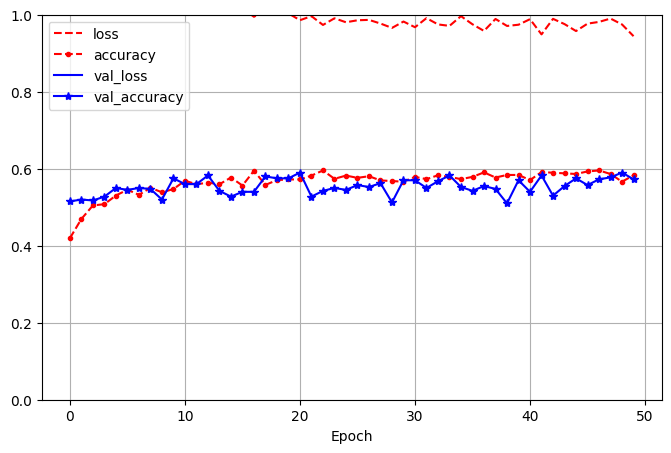

13/13 [==============================] - 0s 1ms/step


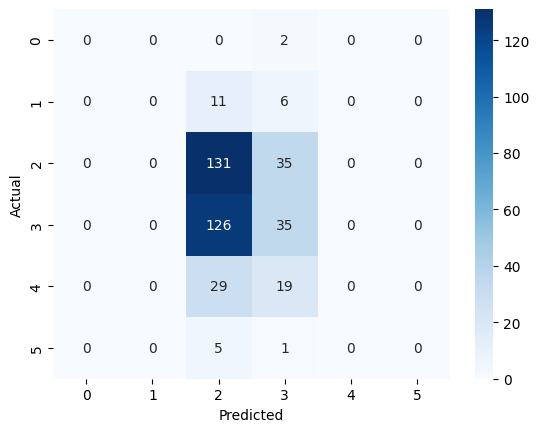

In [428]:
# Plot History of model and metrics

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch", ylim=(0, 1),
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc='upper left')
plt.show()

# Evaluate model on test data
model.evaluate(X_test, y_test_binary)

# Predict on test data
y_pred = model.predict(X_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_binary.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

